In [ ]:
from __future__ import division

import folium
import pandas as pd
from ipykernel.pickleutil import can_map

#list with every needed column's name from a .csv file in order to create the train.csv file

l=[]
l.append('id')
l.append('zipcode')
l.append('transit')
l.append('Bedrooms')
l.append('Beds')
l.append('Review_scores_rating')
l.append('Number_of_reviews')
l.append('Neighbourhood')
l.append('Name')
l.append('Latitude')
l.append('Longitude')
l.append('Last_review')
l.append('Instant_bookable')
l.append('Host_since')
l.append('Host_response_rate')
l.append('Host_identity_verified')
l.append('Host_has_profile_pic')
l.append('First_review')
l.append('Description')
l.append('City')
l.append('cancellation_policy')
l.append('Bed_type')
l.append('Bathrooms')
l.append('Accommodates')
l.append('Amenities')
l.append('Room_type')
l.append('Property_type')
l.append('price')
l.append('Availability_365')
l.append('Minimum_nights')

for i in range(len(l)):
    l[i] = l[i].lower()

    
    
#second list with the name of the columns read from another .csv file 
#in order to concat the results and make the final "train.csv" file as complete as possible
l1 = []

l1.append('id')
l1.append('number_of_reviews')
l1.append('neighbourhood')
l1.append('latitude')
l1.append('longitude')
l1.append('last_review')
l1.append('room_type')
l1.append('price')
l1.append('availability_365')
l1.append('minimum_nights')

f1 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\february\listings.csv', usecols=l, low_memory=False)
temp1 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\february\listings0.csv', usecols=l1, low_memory=False)

f1['month'] = '2/february'   #this format comes in handy when comparing months

counter = -1


#concatting the 2 .csv files and filling as many null values as possible
for i in range(len(f1)):
    counter += 1
    for j in range(len(l)):
        if pd.isnull(f1.at[i, l[j]]):
            for k in range(len(l1)):
                if l1[k] == l[j]:
                    f1.at[i, l[j]] = temp1.at[i, l1[k]]
                    break

                    
f1.to_csv('train.csv', index=False)



#the same process is repeated until "train.csv" is created

f2 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\march\listings.csv', usecols=l, low_memory=False)
temp2 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\march\listings0.csv', usecols=l1, low_memory=False)

f2['month'] = '3/march'

counter = -1

for i in range(len(f2)):
    counter += 1
    for j in range(len(l)):
        if pd.isnull(f2.at[i, l[j]]):
            for k in range(len(l1)):
                if l1[k] == l[j]:
                    f2.at[i, l[j]] = temp2.at[i, l1[k]]
                    break

                    

f2.to_csv('train.csv', mode='a', index=False, header=False)

f3 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\april\listings.csv', usecols=l, low_memory=False)
temp3 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\april\listings0.csv', usecols=l1, low_memory=False)

f3['month'] = '4/april'

counter = -1

for i in range(len(f3)):
    counter += 1
    for j in range(len(l)):
        if pd.isnull(f3.at[i, l[j]]):
            for k in range(len(l1)):
                if l1[k] == l[j]:
                    f3.at[i, l[j]] = temp3.at[i, l1[k]]
                    break

# f2.to_csv('b.csv', index=False)

f3.to_csv('train.csv', mode='a', index=False, header=False)


file = pd.read_csv('train.csv')


#those will be needed in 1.10(last_review)
rf0 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\february\reviews.csv', low_memory=False)
rf1 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\march\reviews.csv', low_memory=False)
rf2 = pd.read_csv(r'C:\Users\teo\Desktop\ted 1\data\april\reviews.csv', low_memory=False)



In [ ]:
'''
a room might be in record for more than one month,so any duplicates must
be dropped in order to have a more precise result.

value_counts() returns a Series containing counts of unique values that gets
converted to a dataframe with reset_index()
'''
q1 = file.drop_duplicates(subset=['id', 'room_type'], keep='first')
q1 = q1['room_type'].value_counts().reset_index(name='Count')

print("Most common room_type: ", q1.at[0, 'index'])

Most common room_type:  Entire home/apt


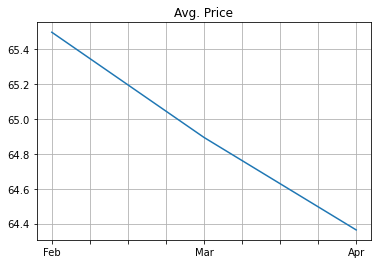

In [ ]:
"""
f1,f2,f3 are 3.csv files from 3 different months.
Column 'price' has dollar signs which makes computing impossible,
so we deleted them,keeping only the value as a float number

Arithmetic mean is the sum of data divided by the number of data-points.
So mean() computes exactly that to the column 'price'

"""
f1['price'] = f1['price'].replace('[$,]', '', regex=True).astype(float)
f2['price'] = f2['price'].replace('[$,]', '', regex=True).astype(float)
f3['price'] = f3['price'].replace('[$,]', '', regex=True).astype(float)

#creating a plot with the average price of each month

dfavG = pd.DataFrame(columns = ['Feb', 'Mar', 'Apr'], data = [[f1['price'].mean(), f2['price'].mean(), f3['price'].mean()]])


dfavG.sum().plot(title = 'Avg. Price', kind = 'line', grid = True)

In [ ]:
'''
We group our data by the column 'neighbourhood',getting distinct 'neighbourhood' values
Then we sum the number of reviews for each unique neighbourhood,sort the result
and turn it into a dataframe.

'''

q3 = file.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index(name='Reviews')
q3[0:5]

,neighbourhood,Reviews
0,Plaka,132361
1,Koukaki,90357
2,Neos Kosmos,83348
3,Psyri,54353
4,Metaxourgeio,44792


In [ ]:
'''
Drop any duplicates,group by neighbourhood and count unique id's of rooms for each neighbourhood
'''

q4 = file.drop_duplicates(subset=['id','neighbourhood'], keep='first')
count_nl = q4.groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).reset_index(name='Count')
count_nl[0:1]

,neighbourhood,Count
0,Plaka,1216


In [ ]:
'''
Group our data by neighbourhood and month.
Count unique elements that belong to some a group.
size() is used because when we group our dataframe it becomes a series so count() cannot be used

We finally change the way column 'month' is stored for better presentation.
'''


q5 = file.groupby(['neighbourhood','month']).size().reset_index(name='count').sort_values(by=['neighbourhood','month'],ascending=[True,True])

for i in range(len(q5)):
    if q5.at[i,'month']=="2/february":
        q5.at[i,'month']="february"
    elif q5.at[i,'month']=="3/march":
        q5.at[i,'month']="march"
    else:
        q5.at[i,'month']="april"

q5



,neighbourhood,month,count
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,february,2
1,Agios Loukas,february,68
2,Agios Loukas,march,70
3,Agios Loukas,april,71
4,Agios Nikolaos,february,196
...,...,...,...
135,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,february,1
136,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,february,22
137,ΠΟΛΥΓΩΝΟ,february,1
138,ΠΡΟΜΠΟΝΑ,february,1


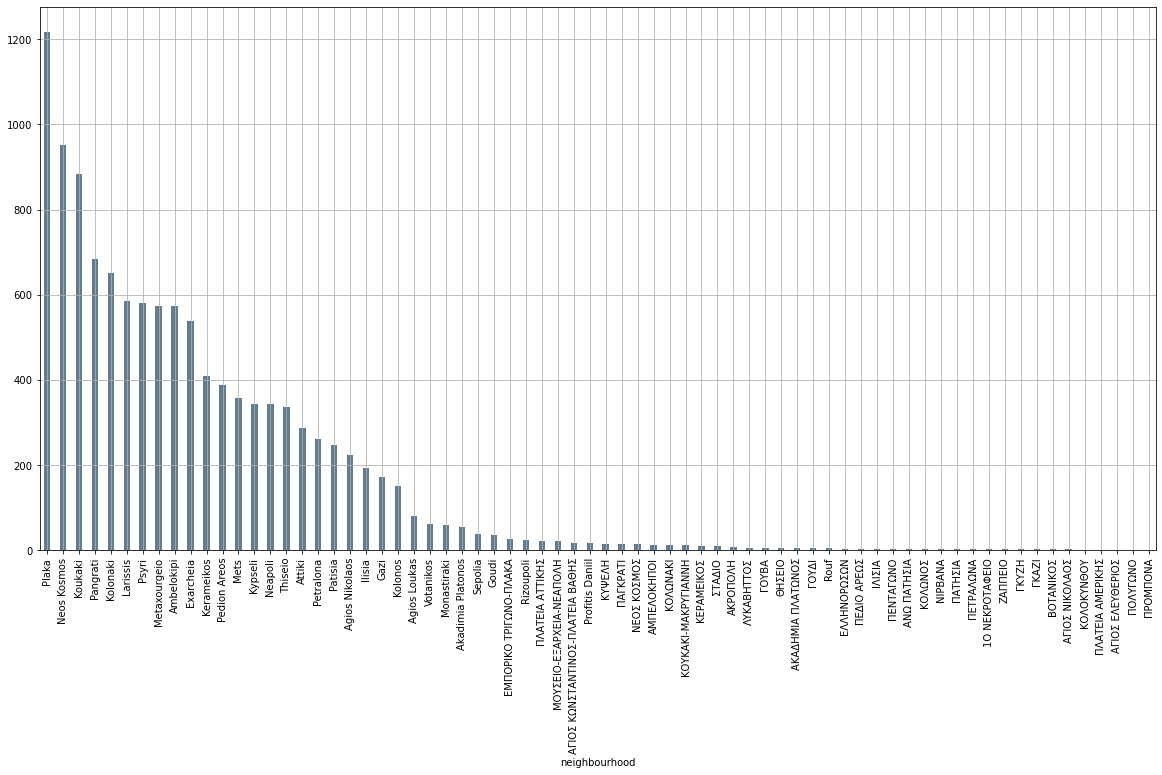

In [ ]:
'''
Same logic with the rest,should be self-explanatory.

The histogram shows how many different rooms each neighbourhood has had
in the 3 month span.

'''


q6=file

q6.drop_duplicates(subset=['id', 'neighbourhood'], keep='first', inplace=True)


q6=q6.groupby(['neighbourhood']).size().reset_index(name='count').sort_values(by='count',ascending=False)
q6.plot(kind='bar',grid=True,x='neighbourhood',y='count', color='#607c8e',legend=False,width=0.4,figsize=(20,10))


In [ ]:
"""
Grouping by neighbourhood and room type gives us the count for every
pair <neighbourhood,room_type>,if that pair exists of course.So we sort
every neighbourhood based on its count and for every neighbourhood we keep
the pair that has the biggest count.
"""



q7=file.drop_duplicates(subset=['id','room_type','neighbourhood'],keep='first')
q7 = q7.groupby(['neighbourhood','room_type']).size().reset_index(name='count').sort_values(by=['neighbourhood','count'],ascending=True)
q7.drop_duplicates(subset='neighbourhood',keep='last',inplace=True)
q7

,neighbourhood,room_type,count
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire home/apt,2
1,Agios Loukas,Entire home/apt,69
4,Agios Nikolaos,Entire home/apt,192
6,Akadimia Platonos,Entire home/apt,44
9,Ambelokipi,Entire home/apt,536
...,...,...,...
131,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,Entire home/apt,1
132,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,Entire home/apt,15
134,ΠΟΛΥΓΩΝΟ,Entire home/apt,1
135,ΠΡΟΜΠΟΝΑ,Entire home/apt,1


In [ ]:
"""
Get rid of $,drop duplicates,get average price for every different room type
,sort values and show the most expensive one.
"""


file['price'] = file['price'].replace('[$,]', '', regex=True).astype(float)
q8 = file.drop_duplicates(subset=['id', 'price'], keep='first')
q8 = file.groupby('room_type')['price'].mean().reset_index(name='Average price').sort_values(by='Average price',ascending=False).head(1)
q8

,room_type,Average price
1,Private room,83.521292


In [ ]:
"""
Coordinates for every room are taken from 'train.csv'
A base map is created with folium.Map
Marker cluster is added for a smoother experience.(zoom in and out to see the difference)
For every room a popup is added showing its name
Map is saved to 'map.html' which is included inside our .zip file

"""


q9=f1

coordinates=q9[['latitude','longitude']]
coolist=coordinates.values.tolist()

import folium
from folium.plugins import MarkerCluster

map=folium.Map(location=coolist[0],zoom_start=12)
marker_cluster=MarkerCluster().add_to(map)
for element in range(len(coolist)):
    popup1=folium.Popup(q9['room_type'][element],parse_html=True)
    folium.Marker(coolist[element],popup=popup1).add_to(marker_cluster)

from IPython.display import IFrame
map.save('map.html')
IFrame("map", width=800, height=650)

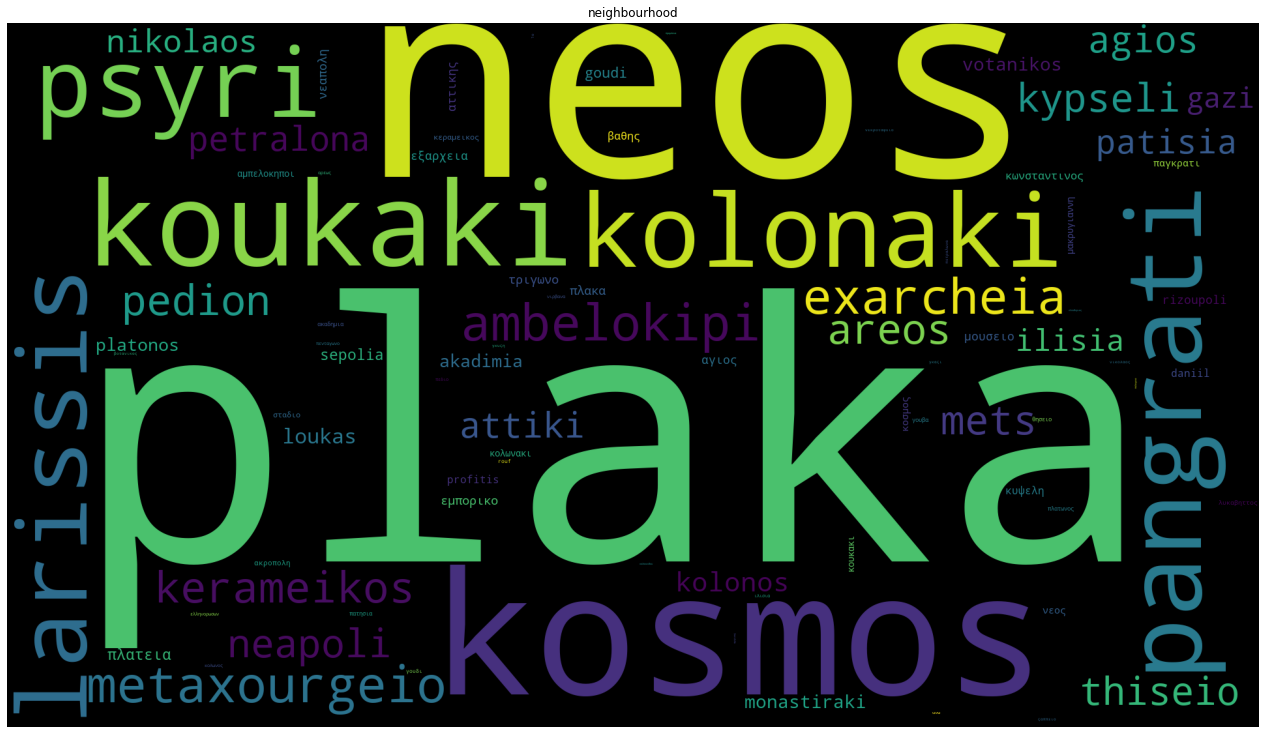

In [ ]:
"""
Stop words are set for a more effective wordcloud creation.
A list that contains all different neighbourhood is created
A wordcloud based on given conditions is created and showed below.

Same logic applies for the rest.

"""


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS



stop_words = set(STOPWORDS)
stop_words.update(ENGLISH_STOP_WORDS)

neigh = file['neighbourhood']
neigh_list = neigh.values.tolist()
for i in range(len(neigh)):
    neigh_list[i] = neigh_list[i].lower()

# Create and generate a word cloud image:
cloud1 = WordCloud(background_color = 'black', mode = 'RGB', stopwords = stop_words, width = 1920, height = 1080, collocations = False)
wordcloud1 = cloud1.generate(' '.join(neigh_list))

plt.figure(figsize = (19,10), facecolor = None)
plt.title("neighbourhood")
plt.imshow(wordcloud1)
plt.axis('off')
plt.tight_layout(pad=0)

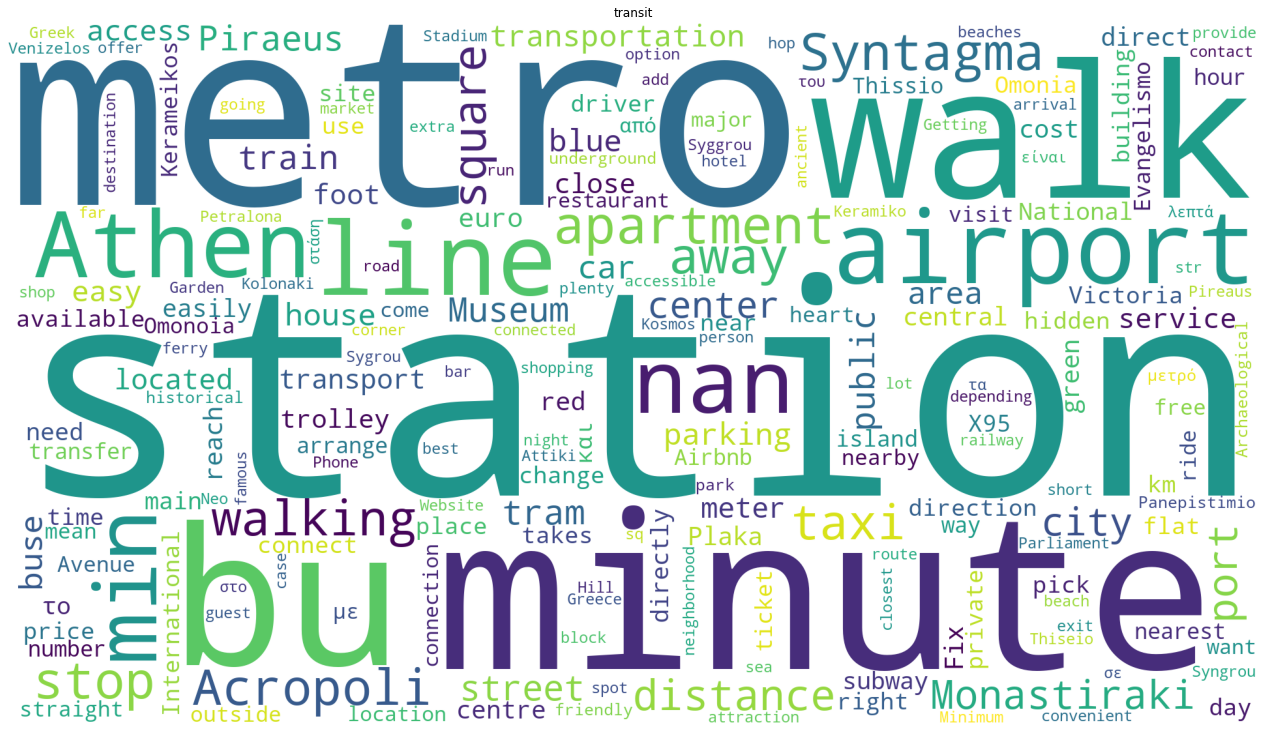

In [ ]:
transit = file['transit']
transit_list = transit.values.tolist()


# Create and generate a word cloud image:
cloud2 = WordCloud(background_color = 'white', mode = 'RGB', stopwords = stop_words, width = 1920, height = 1080, collocations = False)
wordcloud2 = cloud2.generate(str(transit_list))

plt.figure(figsize = (19,10), facecolor = None)
plt.title("transit")
plt.imshow(wordcloud2)
plt.axis('off')
plt.tight_layout(pad=0)

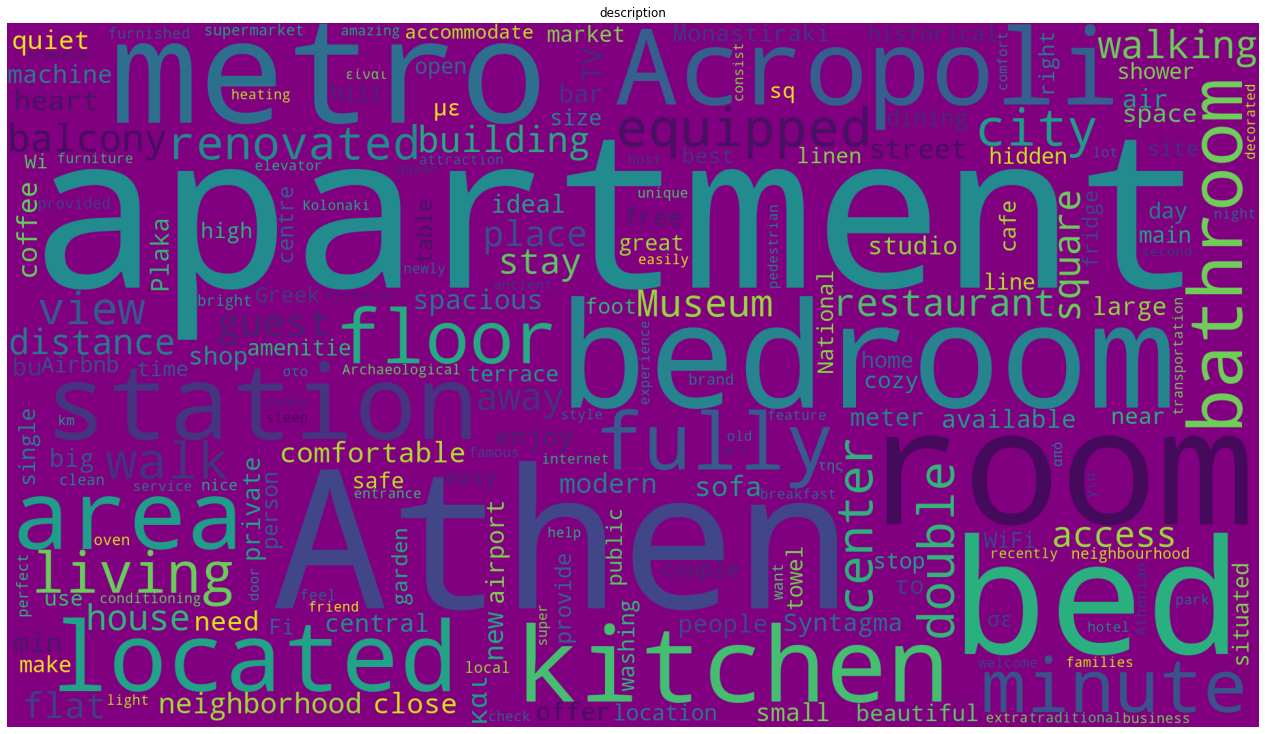

In [ ]:
descr = file['description']
descr_list = descr.values.tolist()


# Create and generate a word cloud image:
cloud3 = WordCloud(background_color = 'purple', mode = 'RGB', stopwords = stop_words, width = 1920, height = 1080, collocations = False)
wordcloud3 = cloud3.generate(str(descr_list))

plt.figure(figsize = (19,10), facecolor = None)
plt.title("description")
plt.imshow(wordcloud3)
plt.axis('off')
plt.tight_layout(pad=0)

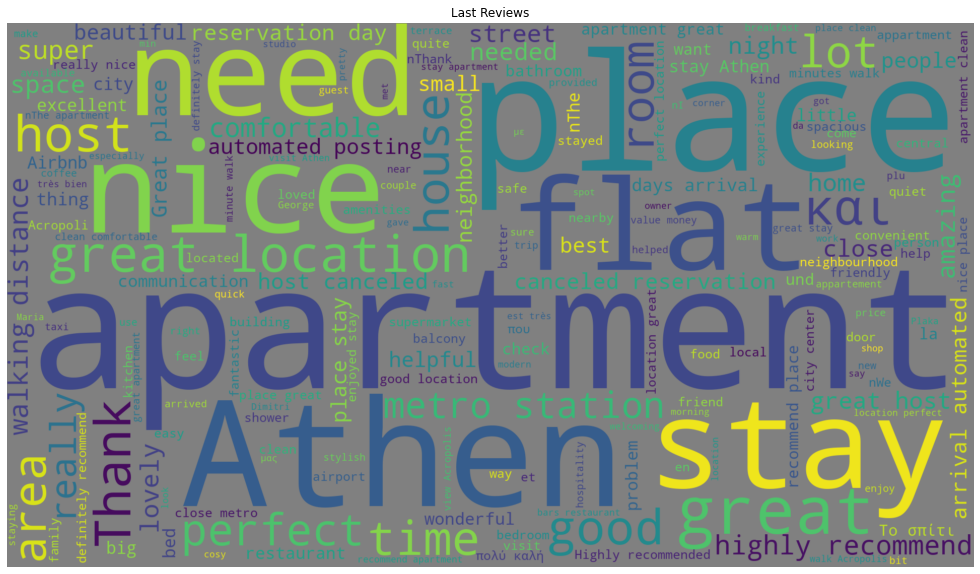

In [ ]:

#rf0,rf1,rf2 were created in the first cell

rf0.to_csv('rf.csv', index=False)
rf1.to_csv('rf.csv', mode='a', index=False, header=False)
rf2.to_csv('rf.csv', mode='a', index=False, header=False)

frf = pd.read_csv('rf.csv')
frf = frf.sort_values(by = ['listing_id', 'date'], ascending=[True, False])
frf = frf.drop_duplicates(subset=['listing_id'], keep='first')



#we filter out list in order to avoid nan values
lr_list = frf['comments'].values.tolist()
lr_list = [x for x in lr_list if str(x) != 'nan']



# show only 10 words in the wordcloud . 
cloud4 = WordCloud(background_color = 'gray', mode = 'RGB', stopwords = stop_words, width=1920, height=1080)
wordcloud4 = cloud4.generate(str(lr_list)) 

# plot the WordCloud image
plt.figure(figsize = (19,10), facecolor = None)
plt.title('Last Reviews')
plt.imshow(wordcloud4, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show()

In [ ]:
"""
The first information that we extracted is: The worst 5 neighbourhoods based on rating

In order to do that,we computed the average rating for every different neighbourhood
"""

q11=file.drop_duplicates(subset=['id','neighbourhood','review_scores_rating'],keep='first')
q11 = q11.groupby(['neighbourhood'])['review_scores_rating'].mean().reset_index(name='Average rating').sort_values(by=['Average rating'],ascending=True).head(5)
q11


,neighbourhood,Average rating
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,80.000000
48,ΘΗΣΕΙΟ,86.333333
46,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,88.625000
66,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,92.818182
33,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,93.000000


In [ ]:
"""
The second information that we extracted is : Top 10 rooms based on most minimum nights required.

"""

q12 = file.groupby(['neighbourhood','id','minimum_nights']).size().reset_index(name='max').sort_values(by='minimum_nights',ascending=False)
q12.drop_duplicates(subset=['neighbourhood'],keep='first',inplace=True)
q12=q12.loc[:,q12.columns!='max']
q12[0:10]

,neighbourhood,id,minimum_nights
10928,Thiseio,470219,1000
2163,Kerameikos,470219,1000
8610,Pedion Areos,25118792,1000
9393,Plaka,18567067,700
2863,Kolonaki,21703868,500
1975,Ilisia,1315027,444
7488,Pangrati,1315027,444
692,Ambelokipi,24581727,365
5313,Metaxourgeio,17816125,290
3454,Koukaki,9952717,222


In [ ]:
"""
Fill nan values with a string 'NULL',so these values remain distinguinshable
while making concatting 2 colums possible

CountVectorizer tokenizes all unigrams and bigrams
Model is trained with .fit_transform
Then a dataframe is created with the weight of each different bigram and unigram
based on tfidf

"""



q31=file[['id','name','description']]
q31=q31.fillna('NULL')
q31=q31.drop_duplicates(subset=['id','name','description'],keep='first').reset_index(drop=True)

q31["concat"] = q31["name"] + q31["description"]


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(ngram_range=(1,2),stop_words=ENGLISH_STOP_WORDS, analyzer='word')
sf = cvec.fit_transform(q31['concat'])
#print(q31['concat'])
#frequencies = sum(sparse_matrix).toarray()[0]
##tt = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
##tt.sort_values(by='frequency')

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df=weights_df.sort_values(by='weight', ascending=False).reset_index()
#weights_df





        

        
        

        

In [ ]:
"""
l1 is a list of lists that contains every unigram.
then we separate every list (l1[i]) from a sentence into words
then we create every bigram from l1[i] lists and push it to l2
and we create new temp list with every unigram and bigram all together for each id

"""



l1 = q31['concat'].values.tolist()
temp=[]
for i in range(0,len(l1)):
    l2=[]
    l1[i] = re.sub("[\"\',./)(]","",l1[i]).split()
 
    x0=weights_df[weights_df['term'].isin(l1[i])]
    
    for j in range(0, len(l1[i])):
        if j!=0:
            l2.append(l1[i][j-1] + ' ' + l1[i][j])
    
    x1=weights_df[weights_df['term'].isin(l2)]
    
    
    x0term=x0['term']

    x0list=x0term.values.tolist()


    x1term=x1['term']
    x1list=x1term.values.tolist()

    temp.append(x0list+x1list)


In [ ]:
from collections import Counter
from numpy.testing import assert_almost_equal
from operator import itemgetter

"""
cosine similarity for every id combination
using cosine similarity math formula"""

cosine=[]
k=0
top=[]

for i in range(0,len(temp)):
    a_vals = Counter(temp[i])
    
    for j in range(i+1,len(temp)):
        b_vals = Counter(temp[j])
        words  = list(a_vals.keys() | b_vals.keys())
        a_vect = [a_vals.get(word, 0) for word in words]        
        b_vect = [b_vals.get(word, 0) for word in words]        

        len_a  = sum(av*av for av in a_vect) ** 0.5             
        len_b  = sum(bv*bv for bv in b_vect) ** 0.5             
        dot    = sum(av*bv for av,bv in zip(a_vect, b_vect))
        if((len_a*len_b)!=0):
            cosine = dot / (len_a * len_b)
            top.append((cosine,q31.at[i,'id'],q31.at[j,'id']))
            if k > 99 : 
                top=sorted(top,key=lambda x: float(x[0]),reverse=True)
                top.pop()
                """
                in order to find top100 most similar ids
                we fill the list with the first 100 comparisons
                and then we add another one item, we sort(descending order) the list,
                and remove the last item(smallest similarity), that way every time we keep 
                100 most similar
                """

            
        k+=1
        


f=pd.DataFrame(top,columns=['CosineSimilarity','idA','idB'])
f

,CosineSimilarity,idA,idB
0,1.0,1425827,4402371
1,1.0,5426236,29786418
2,1.0,8594460,33764094
3,1.0,11716595,30466781
4,1.0,12639647,12639647
...,...,...,...
95,1.0,31509474,32649552
96,1.0,31509474,32649918
97,1.0,31509474,32650034
98,1.0,31509474,32650458


In [ ]:
def recommend(item_id,num):
    cosine=[]
    k=0
    top=[]
    
    
    a_vals = Counter(temp[q31.loc[q31['id']==item_id].index[0]])
    
 

    for j in range(0,len(q31)):
        b_vals = Counter(temp[j])
        words  = list(a_vals.keys() | b_vals.keys())
        a_vect = [a_vals.get(word, 0) for word in words]        
        b_vect = [b_vals.get(word, 0) for word in words]        

        len_a  = sum(av*av for av in a_vect) ** 0.5             
        len_b  = sum(bv*bv for bv in b_vect) ** 0.5             
        dot    = sum(av*bv for av,bv in zip(a_vect, b_vect))
        if((len_a*len_b)!=0)and(j!=q31.loc[q31['id']==item_id].index[0]):
            cosine = dot / (len_a * len_b)
            top.append((cosine,q31.at[q31.loc[q31['id']==item_id].index[0],'id'],q31.at[j,'id']))
            if k>num -1: 
                top=sorted(top,key=lambda x: float(x[0]),reverse=True)
                top.pop()

        """
        for the given id we check every comparison and keep 
        n most similar, same implementation with the cell above
        """
        k+=1




    f=pd.DataFrame(top,columns=['CosineSimilarity','idA','idB'])
    print(f)

recommend(19410932,5)

   CosineSimilarity       idA       idB
0          0.246718  19410932  24147021
1          0.231154  19410932  17453728
2          0.230022  19410932  25878860
3          0.226779  19410932  21616184
4          0.225374  19410932  17957334


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder



finder = BigramCollocationFinder.from_documents(l1)
bigram_measures = nltk.collocations.BigramAssocMeasures()

# only bigrams that appear 40+ times
finder.apply_freq_filter(40) 

# return the 10 bi-grams with the highest PMI
result = finder.nbest(bigram_measures.pmi, 10)
print(result)


[('pre-war', 'period-'), ('Deposit', 'Box'), ('δημόσια', 'συγκοινωνία'), ('επαγγελματίες', 'ταξιδιώτες'), ('URL', 'HIDDEN'), ('communication', 'We’re'), ('Fokionos', 'Negri'), ('stones', 'throw'), ('olive', 'oil'), ('Childrens', 'Activities')]
